In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import pylab
import glob, os
import scipy.stats as stats
from scipy.stats import gaussian_kde
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import chi2
from sklearn.metrics import r2_score
import timeit
%matplotlib inline

In [3]:
# Format to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# KC data

In [4]:
DATA_PATH = 'R:/Angela/fast_trips/KCMetro'
FLEET = os.path.join(DATA_PATH, 'fleet.csv')
ROUTE = os.path.join(DATA_PATH, '151AllTrips.csv')
DATE_LIST = ['2015_04_28.csv', '2015_04_29.csv', '2015_04_30.csv', '2015_05_05.csv', '2015_05_06.csv', '2015_05_07.csv']

In [5]:
APC = {}
i = 1
for csv_file in DATE_LIST:
    APC_df = pd.read_csv(os.path.join(DATA_PATH, csv_file))
    APC_df['date_id'] = i
    APC[i] = APC_df
    i += 1

In [6]:
KC_data_raw = pd.DataFrame(columns = ['TRIP_ID', 'RTE', 'VEHICLE_ID', 'BUS_TYPE', 'NUM_DOORS',
                                  'STOP_SEQ', 'STOP_ID', 'DWELL_SEC', 'DOOR_OPEN_SEC', 
                                  'ONS', 'OFFS', 'LOAD', 'date_id', 'capacity', 
                                  'Route Type', 'pre_load','downtown_stop'])

In [7]:
for my_data in APC.values():
    print len(my_data)
    #my_data = clean_data(my_data)
    KC_data_raw = pd.concat([KC_data_raw, my_data])

581968
582850
583272
584437
582514
585595


In [8]:
import pylab as plt

x = KC_data_raw['DOOR_OPEN_SEC'][(KC_data_raw['DOOR_OPEN_SEC']< 300) & (KC_data_raw['DOOR_OPEN_SEC']>0)]
#y = 150 + 25*plt.randn(1000)
#n, bins, patches = plt.hist([x])

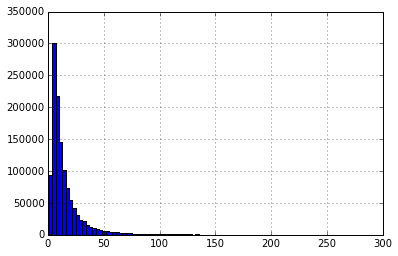

In [9]:
x.hist(bins = 100)

In [50]:
len(KC_data_raw)

3500636

# SF data

In [10]:
SF_data_raw = pd.read_csv('R:/Angela/fast_trips/2015SampleDataSpring_6day.csv')

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2868: DtypeWarning: Columns (72,75,77,83,117) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
len(SF_data_raw)

494613

In [12]:
SF_data_raw.columns

Index([u'Unnamed: 0', u'STOPA', u'V2', u'QSTOP', u'ANAME', u'HR', u'MIN',
       u'SEC', u'ON', u'OFF',
       ...
       u'RTDIRSEQ', u'DOORDWELL', u'WAITDWELL', u'EOL', u'DOORTIME',
       u'WAITTIME', u'TIMEPER', u'ROUTEA', u'TEPPER', u'date_id'],
      dtype='object', length=120)

In [13]:
SF_data_raw['COMPUTE_TIMESTOP'] = SF_data_raw['HR']*3600 + SF_data_raw['MIN']*60 + SF_data_raw['SEC']
# COMPUTE DOORCLOSE=(( DHR * 3600) + (DMIN * 60) + DSEC)
SF_data_raw['COMPUTE_DOORCOLSE'] = SF_data_raw['DHR']*3600 + SF_data_raw['DMIN']*60 + SF_data_raw['DSEC']
# COMPUTE DOORDWELL=DOORCLOSE - TIMESTOP
SF_data_raw['COMPUTE_DOORDWELL'] = SF_data_raw['COMPUTE_DOORCOLSE'] - SF_data_raw['COMPUTE_TIMESTOP']

In [14]:
y = SF_data_raw['COMPUTE_DOORDWELL'][(SF_data_raw['COMPUTE_DOORDWELL']<300) & (SF_data_raw['COMPUTE_DOORDWELL']>0)]

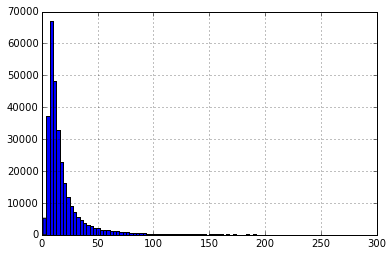

In [15]:
y.hist(bins = 100)

# SF v.s. KC

In [16]:
msk = np.random.rand(len(x)) < 0.9
xx = x[~msk]

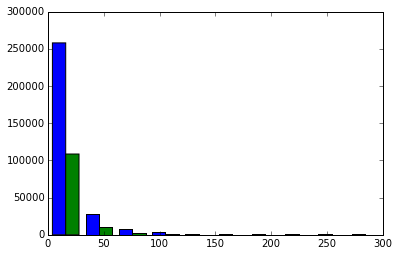

In [17]:
n, bins, patches = plt.hist([y, xx])

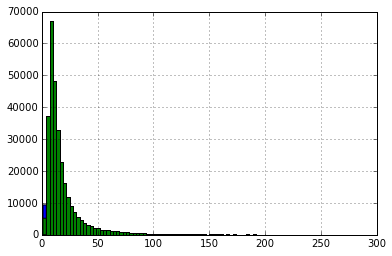

In [18]:
xx.hist(bins=100)
y.hist(bins=100)

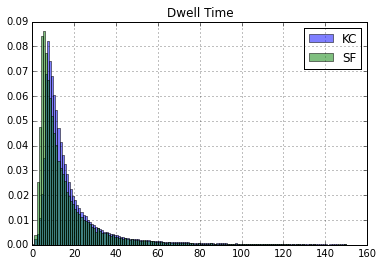

In [19]:
y.hist(bins=150, normed=True, alpha=0.5, range=[0,150], label='KC')

xx.hist(bins=150, normed=True, alpha=0.5, range=[0,150], label='SF')

plt.legend(loc='upper right')
plt.title('Dwell Time')

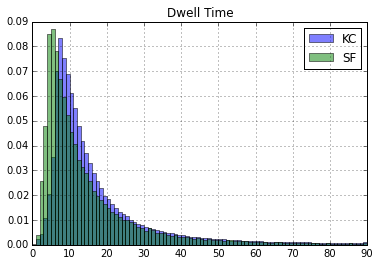

In [20]:
y.hist(bins=90, normed=True, alpha=0.5, range=[0,90], label='KC')

xx.hist(bins=90, normed=True, alpha=0.5, range=[0,90], label='SF')

plt.legend(loc='upper right')
plt.title('Dwell Time')

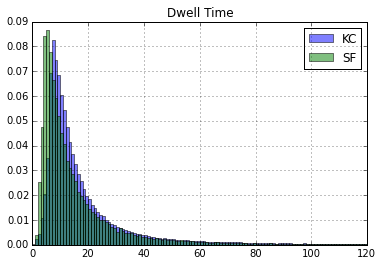

In [21]:
y.hist(bins=120, normed=True, alpha=0.5, range=[0,120], label='KC')

xx.hist(bins=120, normed=True, alpha=0.5, range=[0,120], label='SF')

plt.legend(loc='upper right')
plt.title('Dwell Time')